# Data Science & Business Analytics Intern at The Sparks Foundation - GRIP APRIL'21 Batch
### Author: Sumit Mishra

##  TASK 1: Prediction using Supervised ML

### Predict the percentage of a student based on the no. of study hours.

### 1. Importing the required header files

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

### 2. Reading the data

In [ ]:
#Data can be found at http://bit.ly/w-data

#Reading the csv file using pandas library
data = pd.read_csv('data.csv')
#Printing shape of data
print(data.shape)
#Displaying 5 records
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


* There are only 25 records and 2 features in our dataset, in which one(Hours) is independent and another(Scores) is dependent feature or class variable.

In [ ]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* There are total of 25 entries in data and all are not null.

In [ ]:
#Basic description about the data such as count, mean, std, etc.
#The below details is only for numerical fields of data(In our case all columns are numerical). 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 3. Data Visualization

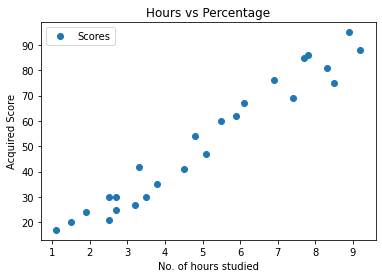

In [ ]:
#Plotting the distribution of scores w.r.t. Hours
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('No. of hours studied')  
plt.ylabel('Acquired Score')  
plt.show()

We can see there is some linear relationship in our features of dataset and the function to predict score might also look like montonic function as hours increases, scores also increases.

### 4. Preparing the data

In [ ]:
x = data['Hours'].values
x = x.reshape(-1, 1)
y = data['Scores'].values

x.shape, y.shape

((25, 1), (25,))

### 5. Splitting the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### 6. Training ML Algorithm(In our case Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#Fitting the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 7. Evaluating the model

In [ ]:
from sklearn.metrics import mean_absolute_error

#We'll be using coefficient of determination(R^2) as well as mean_absolute_error for evaluating this model.
#mean_absolute_error is one of the ideal metric for regression task although there is no optimal value for it.
#But the balance between train and test error should be there in MAE to avoid
#underfitting(very high MSE for test/validation/unseen data) and overfitting(very low MSE for training data).

print('coefficient of determination(R^2) of train set:',lr.score(x_train, y_train))
print('coefficient of determination(R^2) of test set:',lr.score(x_test, y_test))
print('\n')
print('MAE(mean_absolute_error) of train set:',mean_absolute_error(y_train, lr.predict(x_train)))
print('MAE(mean_absolute_error) of test set:',mean_absolute_error(y_test, lr.predict(x_test)))

coefficient of determination(R^2) of train set: 0.9480321991752112
coefficient of determination(R^2) of test set: 0.9480687219658118


MAE(mean_absolute_error) of train set: 4.741151519248315
MAE(mean_absolute_error) of test set: 5.726716125325313


* Coefficient of determination of 0.9480321991752112 indicates that our model is fitting more than 94.8% of our data.
* There is not much difference between R^2 and mean absolute error of train and test data, so we can say our model is neither overfitting nor underfitting.
* But still our model is not well stable as we've very limited data, adding more data can improve our model performance.

In [ ]:
for i in range(len(x_test)):
  print('Input:',x_test[i][0],'hours','\tActual score:',y_test[i],'\tPredicted score:',lr.predict([x_test[i]])[0])

Input: 8.5 hours 	Actual score: 75 	Predicted score: 86.00273377934691
Input: 6.9 hours 	Actual score: 76 	Predicted score: 70.26524986376896
Input: 8.3 hours 	Actual score: 81 	Predicted score: 84.03554828989967
Input: 2.7 hours 	Actual score: 25 	Predicted score: 28.954354585376798
Input: 7.8 hours 	Actual score: 86 	Predicted score: 79.11758456628155


* The predicted and actual score are not exactly same but not so different.

### 8. What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
print('If student studies for 9.25 hrs/ day, then the predicted score is',lr.predict([[9.25]])[0])

If student studies for 9.25 hrs/ day, then the predicted score is 93.37967936477408


### 9. Conclusion

* The prediction of our linear regression model is quite good.
* Although due to limted data it has its own limitation such as here the prediction is kind of monotonic(as hours increases score also increases).
* Adding more data and feature might improve this model much more because currently prediction is dependent only on one feature.